## EE 269 Final Project
Lycia Tran
Fall 2023

Dataset: https://www.kaggle.com/code/tonyfischer/epileptic-seizure-recognition/notebook

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import seaborn as sns
sns.set_style("whitegrid")

In [2]:
data = pd.read_csv('Epileptic Seizure Recognition.csv')

# view first 5 rows of the data
data.head()

,Unnamed,X1,X2,X3,X4,X5,X6,X7,X8,X9,...,X170,X171,X172,X173,X174,X175,X176,X177,X178,y
0,X21.V1.791,135,190,229,223,192,125,55,-9,-33,...,-17,-15,-31,-77,-103,-127,-116,-83,-51,4
1,X15.V1.924,386,382,356,331,320,315,307,272,244,...,164,150,146,152,157,156,154,143,129,1
2,X8.V1.1,-32,-39,-47,-37,-32,-36,-57,-73,-85,...,57,64,48,19,-12,-30,-35,-35,-36,5
3,X16.V1.60,-105,-101,-96,-92,-89,-95,-102,-100,-87,...,-82,-81,-80,-77,-85,-77,-72,-69,-65,5
4,X20.V1.54,-9,-65,-98,-102,-78,-48,-16,0,-21,...,4,2,-12,-32,-41,-65,-83,-89,-73,5


In [3]:
# drop first column, only contains metadata
data.drop('Unnamed', axis=1, inplace=True)

# classify having epileptic seizure or not label, 1 = seizure, 0 = no seizure
class_relabeling = {1:1, 2:0, 3:0, 4:0, 5:0}
data.replace({'y': class_relabeling}, inplace=True)

counts = data['y'].value_counts()
print(f"Number of records epileptic {counts[1]} vs non-epileptic {counts[0]}")


Number of records epileptic 2300 vs non-epileptic 9200


In [4]:
data.head()

,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,...,X170,X171,X172,X173,X174,X175,X176,X177,X178,y
0,135,190,229,223,192,125,55,-9,-33,-38,...,-17,-15,-31,-77,-103,-127,-116,-83,-51,0
1,386,382,356,331,320,315,307,272,244,232,...,164,150,146,152,157,156,154,143,129,1
2,-32,-39,-47,-37,-32,-36,-57,-73,-85,-94,...,57,64,48,19,-12,-30,-35,-35,-36,0
3,-105,-101,-96,-92,-89,-95,-102,-100,-87,-79,...,-82,-81,-80,-77,-85,-77,-72,-69,-65,0
4,-9,-65,-98,-102,-78,-48,-16,0,-21,-59,...,4,2,-12,-32,-41,-65,-83,-89,-73,0


In [5]:
# describe non-epileptic data
data[data['y'] == 0].describe().T

,count,mean,std,min,25%,50%,75%,max
X1,9200.0,-8.992609,70.455286,-566.0,-44.0,-7.0,26.0,1726.0
X2,9200.0,-8.877174,70.560110,-609.0,-44.0,-7.0,27.0,1713.0
X3,9200.0,-8.910435,70.372582,-594.0,-45.0,-7.0,28.0,1697.0
X4,9200.0,-8.969783,70.030409,-549.0,-45.0,-8.0,27.0,1612.0
X5,9200.0,-9.085326,69.377958,-603.0,-45.0,-8.0,27.0,1437.0
...,...,...,...,...,...,...,...,...
X175,9200.0,-9.848587,69.550894,-570.0,-45.0,-9.0,27.0,1958.0
X176,9200.0,-9.620435,70.353607,-594.0,-46.0,-8.0,27.0,2047.0
X177,9200.0,-9.395435,70.934300,-563.0,-45.0,-9.0,27.0,2047.0
X178,9200.0,-9.240435,71.185850,-559.0,-45.0,-8.0,27.0,1915.0


In [6]:
# describe epileptic data
data[data['y'] == 1].describe().T

,count,mean,std,min,25%,50%,75%,max
X1,2300.0,-21.936522,342.361939,-1839.0,-193.25,-16.0,159.00,1314.0
X2,2300.0,-19.049130,343.398782,-1838.0,-191.25,-18.0,168.25,1356.0
X3,2300.0,-15.293913,337.489643,-1835.0,-187.00,-12.5,169.25,1274.0
X4,2300.0,-9.836087,332.354833,-1845.0,-184.00,-6.0,166.25,1226.0
X5,2300.0,-3.707391,332.211163,-1791.0,-174.25,-12.0,170.00,1518.0
...,...,...,...,...,...,...,...,...
X175,2300.0,-25.830870,339.650467,-1863.0,-195.00,-14.5,153.25,1205.0
X176,2300.0,-25.043913,335.747017,-1781.0,-192.00,-18.0,150.00,1371.0
X177,2300.0,-24.548261,335.244512,-1727.0,-190.25,-21.5,151.25,1445.0
X178,2300.0,-24.016522,339.819309,-1829.0,-189.00,-23.0,157.25,1380.0


In [7]:
# data is in 1s per row format
# first unpivot into single time series, preserve target y, then take the original index, which is the
# "sample index" of each sample
data_unpivoted = (data
                  .melt(id_vars=['y'], var_name='time_label', value_name='eeg', ignore_index=False)
                  .reset_index()
                  .rename(columns={'index': 'sample_index'})
                  )

# the time index is the index over the 1s time period in each original row in data
data_unpivoted['time_index'] = (data_unpivoted['time_label']
                                .str.extract(r'(\d+)', expand=False)
                                .astype(int)
                                )

# sort each window according to the sample and time and re-order columns
data_unpivoted = (data_unpivoted
                  .sort_values(by=['sample_index', 'time_index'])
                  .reindex(['sample_index', 'time_index', 'eeg', 'y'], axis=1)
                  )

In [8]:
data_unpivoted

,sample_index,time_index,eeg,y
0,0,1,135,0
11500,0,2,190,0
23000,0,3,229,0
34500,0,4,223,0
46000,0,5,192,0
...,...,...,...,...
2000999,11499,174,5,0
2012499,11499,175,4,0
2023999,11499,176,-2,0
2035499,11499,177,2,0


In [9]:
epi = 2300
non_epi = 9200

n = 5

index_n_epileptic = data_unpivoted[data_unpivoted['y'] == 1]["sample_index"].unique()[:n]
index_n_nonepileptic = data_unpivoted[data_unpivoted['y'] == 0]["sample_index"].unique()[:n]

samples_to_show = np.concatenate((index_n_epileptic, index_n_nonepileptic))

In [10]:
#


In [10]:
import warnings
warnings.filterwarnings("ignore", "is_categorical_dtype")
warnings.filterwarnings("ignore", "use_inf_as_na")


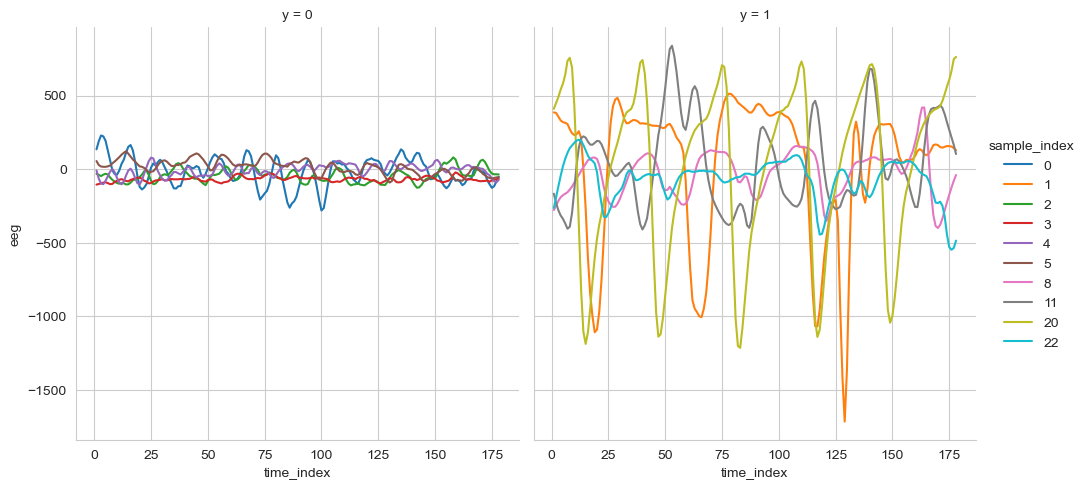

In [11]:
g = sns.relplot(
    data=data_unpivoted[data_unpivoted["sample_index"].isin(samples_to_show)],
    kind='line',
    x='time_index',
    y='eeg',
    col='y',
    hue='sample_index',
    legend='full',
    palette=sns.color_palette()
)


In [ ]:
g = sns.catplot(
    data=data_unpivoted.groupby(["sample_index", "y"]).std().reset_index(),
    kind='box',
    x='y',
    y='eeg',
)
g.set_ylabels("std of eeg")

In [14]:
#epi = 2300
#non_epi = 9200

#index_n_epileptic = data_unpivoted[data_unpivoted['y'] == 1]["sample_index"].unique()[:epi]
#index_n_nonepileptic = data_unpivoted[data_unpivoted['y'] == 0]["sample_index"].unique()[:non_epi]

#samples_to_show = np.concatenate((index_n_epileptic, index_n_nonepileptic))

#index_n_epileptic

### Join into time series


In [10]:
timeseries_df = data_unpivoted.pivot(index='sample_index', columns='time_index', values='eeg')


y = np.zeros(11500)
for i in range(0,len(data_unpivoted)//178):
    y[i] = data_unpivoted.iloc[i*178]['y']

#pivot_df['y'] = y

timeseries_df


time_index,1,2,3,4,5,6,7,8,9,10,...,169,170,171,172,173,174,175,176,177,178
sample_index,,,,,,,,,,,,,,,,,,,,,
0,135,190,229,223,192,125,55,-9,-33,-38,...,8,-17,-15,-31,-77,-103,-127,-116,-83,-51
1,386,382,356,331,320,315,307,272,244,232,...,168,164,150,146,152,157,156,154,143,129
2,-32,-39,-47,-37,-32,-36,-57,-73,-85,-94,...,29,57,64,48,19,-12,-30,-35,-35,-36
3,-105,-101,-96,-92,-89,-95,-102,-100,-87,-79,...,-80,-82,-81,-80,-77,-85,-77,-72,-69,-65
4,-9,-65,-98,-102,-78,-48,-16,0,-21,-59,...,10,4,2,-12,-32,-41,-65,-83,-89,-73
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11495,-22,-22,-23,-26,-36,-42,-45,-42,-45,-49,...,20,15,16,12,5,-1,-18,-37,-47,-48
11496,-47,-11,28,77,141,211,246,240,193,136,...,-94,-65,-33,-7,14,27,48,77,117,170
11497,14,6,-13,-16,10,26,27,-9,4,14,...,-42,-65,-48,-61,-62,-67,-30,-2,-1,-8


In [11]:
timeseries_data = timeseries_df.to_numpy()
timeseries_data

array([[ 135,  190,  229, ..., -116,  -83,  -51],
       [ 386,  382,  356, ...,  154,  143,  129],
       [ -32,  -39,  -47, ...,  -35,  -35,  -36],
       ...,
       [  14,    6,  -13, ...,   -2,   -1,   -8],
       [ -40,  -25,   -9, ...,   68,   59,   55],
       [  29,   41,   57, ...,   -2,    2,   20]], dtype=int64)

### Split into training and test set

In [12]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(timeseries_data, y, test_size=0.2, random_state=42)

In [13]:
X_train

array([[ -66,  -75,  -95, ...,   81,  -30, -117],
       [ -77,  -50,  -36, ...,   63,   77,   49],
       [ -74,  -67,  -58, ...,   68,   74,   70],
       ...,
       [  90,   26,  -58, ...,   15,  -26,  -72],
       [  91,   79,   55, ...,  223,  232,  229],
       [ -46,   16,   40, ...,  -54,  -80,  -90]], dtype=int64)

In [13]:
y_train

array([1., 0., 0., ..., 0., 1., 0.])

### Take fourier transform of data

data originally 23.6s sampled into 4096 data points, so sampling rate = 173.559 Hz

In [16]:
fs = 173.559

In [32]:

N = len(X_train[0,:])
time = np.linspace(0,N-1, N) / fs
freq = fs * np.linspace(-N//2, N//2, N, dtype = float) / N

X_train_fft = np.zeros(X_train.shape)
for i in range(len(X_train[:,1])):
    X_train_fft[i,:] = np.fft.fftshift(np.fft.fft(X_train[i,:]))

X_test_fft = np.zeros(X_test.shape)
for i in range(len(X_test[:,1])):
    X_test_fft[i,:] = np.fft.fftshift(np.fft.fft(X_test[i,:]))



C:\Users\tranl\AppData\Local\Temp\ipykernel_14716\2831559790.py:7: ComplexWarning: Casting complex values to real discards the imaginary part
  X_train_fft[i,:] = np.fft.fftshift(np.fft.fft(X_train[i,:]))
C:\Users\tranl\AppData\Local\Temp\ipykernel_14716\2831559790.py:11: ComplexWarning: Casting complex values to real discards the imaginary part
  X_test_fft[i,:] = np.fft.fftshift(np.fft.fft(X_test[i,:]))


178


Text(0, 0.5, 'Magnitude')

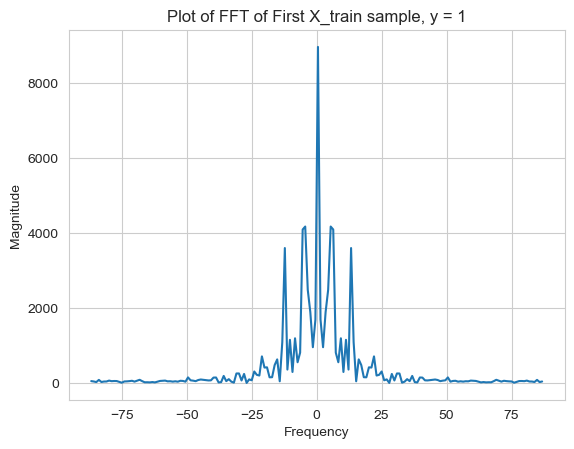

In [15]:
print(len(freq))
plt.plot(freq, abs(X_train_fft[0,:]))
plt.title('Plot of FFT of First X_train sample, y = 1')
plt.xlabel('Frequency')
plt.ylabel('Magnitude')

178


Text(0, 0.5, 'Magnitude')

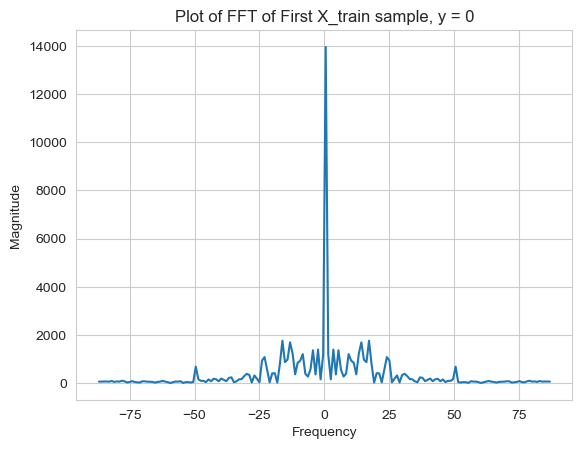

In [16]:
print(len(freq))
plt.plot(freq, abs(X_train_fft[1,:]))
plt.title('Plot of FFT of First X_train sample, y = 0')
plt.xlabel('Frequency')
plt.ylabel('Magnitude')

### Take Wavelet Transfrom using CWT

In [14]:
import pywt

In [17]:
width = fs
widths = np.arange(1, width)
wavelet = 'cmor'


X_train_cwt = []
for i in range(len(X_train)):
    cwtmat, freq_cwt = pywt.cwt(X_train[i],  widths, wavelet, sampling_period = 1/fs)
    X_train_cwt.append(cwtmat)

X_test_cwt = []
for i in range(len(X_test)):
    cwtmat,freq_cwt = pywt.cwt(X_test[i], widths, wavelet, sampling_period = 1/fs)
    X_test_cwt.append(cwtmat)
    
#duration = N/fs
#time = np.arange(N)/fs
#print(time)

c:\Users\tranl\anaconda3\envs\ee269_env\lib\site-packages\pywt\_cwt.py:117: FutureWarning: Wavelets from the family cmor, without parameters specified in the name are deprecated. The name should takethe form cmorB-C where B and C are floats representing the bandwidth frequency and center frequency, respectively (example: cmor1.5-1.0).
  wavelet = DiscreteContinuousWavelet(wavelet)


NameError: name 'N' is not defined

In [25]:
#print(len(time))
#cwtmat, freq_cwt = pywt.cwt(X_train[i], widths, 'mexh', sampling_period = 1/fs)
#print(cwtmat.shape)

In [18]:
X_train_cwt = np.array(X_train_cwt)
X_test_cwt = np.array(X_test_cwt)

print(X_train_cwt.shape)
print(X_test_cwt.shape)

(9200, 173, 178)
(2300, 173, 178)


(173, 178)


c:\Users\tranl\anaconda3\envs\ee269_env\lib\site-packages\matplotlib\contour.py:1578: ComplexWarning: Casting complex values to real discards the imaginary part
  self.zmax = z.max().astype(float)
c:\Users\tranl\anaconda3\envs\ee269_env\lib\site-packages\matplotlib\contour.py:1579: ComplexWarning: Casting complex values to real discards the imaginary part
  self.zmin = z.min().astype(float)
c:\Users\tranl\anaconda3\envs\ee269_env\lib\site-packages\numpy\ma\core.py:2820: ComplexWarning: Casting complex values to real discards the imaginary part
  _data = np.array(data, dtype=dtype, copy=copy,


Text(0.5, 1.0, 'cwt of x_train sample 1, y = 0')

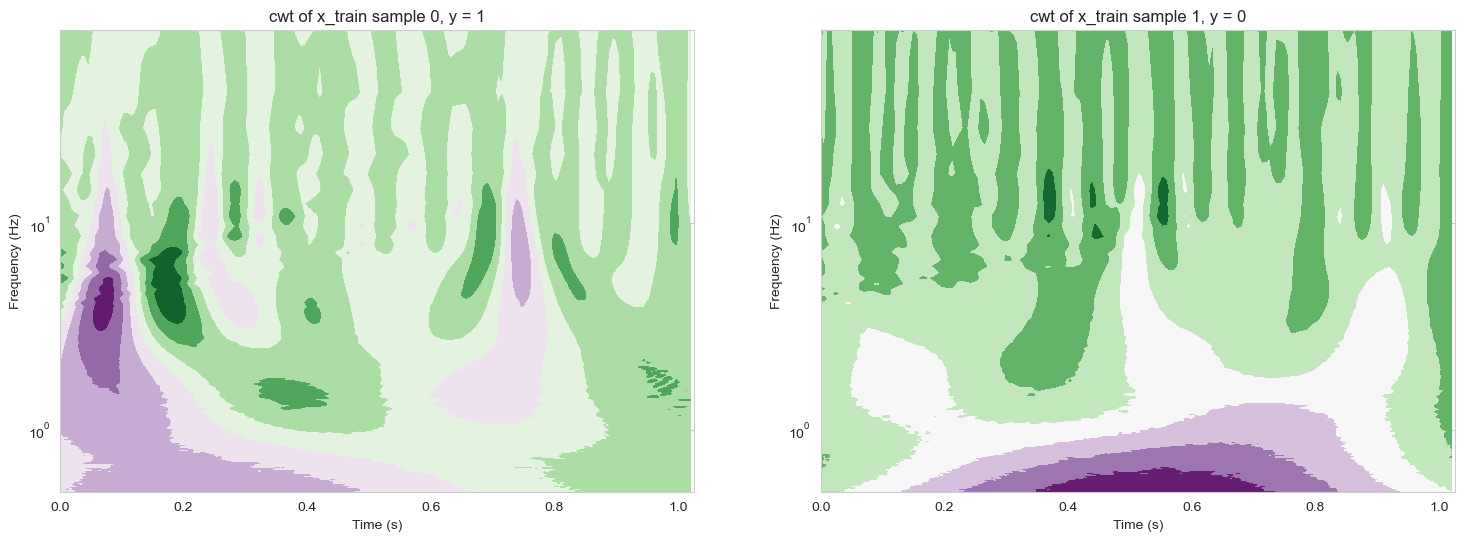

In [20]:
fig, ax = plt.subplots(1, 2, figsize = (18,6))
x_train_1 = X_train_cwt[1]
print(x_train_1.shape)
ax[0].contourf(time, freq_cwt, X_train_cwt[0], cmap = 'PRGn')
ax[0].set_xlim([0, N/fs])
ax[0].set_xlabel('Time (s)')
ax[0].set_yscale('log')
ax[0].set_ylabel('Frequency (Hz)')
ax[0].set_title('cwt of x_train sample 0, y = 1')
ax[1].contourf(time, freq_cwt, X_train_cwt[1], cmap = 'PRGn')
ax[1].set_xlim([0, N/fs])
ax[1].set_xlabel('Time (s)')
ax[1].set_yscale('log')
ax[1].set_ylabel('Frequency (Hz)')
ax[1].set_title('cwt of x_train sample 1, y = 0')

### SVM Classifier
#### Train Linear SVM on time series data

In [26]:
from sklearn.svm import LinearSVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [28]:
model = LinearSVC()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

C:\Users\tranl\AppData\Roaming\Python\Python39\site-packages\sklearn\svm\_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
C:\Users\tranl\AppData\Roaming\Python\Python39\site-packages\sklearn\svm\_base.py:1250: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


In [29]:
# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

print("Accuracy of Linear SVM on Time Series Data:", accuracy)
print("\nConfusion Matrix:\n", conf_matrix)

Accuracy of Linear SVM on Time Series Data: 0.84

Confusion Matrix:
 [[1826    9]
 [ 359  106]]


#### Linear SVM on FFT data

In [55]:
model = LinearSVC()
model.fit(X_train_fft, y_train)
y_pred_fft = model.predict(X_test_fft)

C:\Users\tranl\AppData\Roaming\Python\Python39\site-packages\sklearn\svm\_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
C:\Users\tranl\AppData\Roaming\Python\Python39\site-packages\sklearn\svm\_base.py:1250: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


In [56]:
# Evaluate the model
accuracy_fft = accuracy_score(y_test, y_pred_fft)
conf_matrix_fft = confusion_matrix(y_test, y_pred_fft)

print("Accuracy of Linear SVM on FFT Data:", accuracy_fft)
print("\nConfusion Matrix:\n", conf_matrix_fft)

Accuracy of Linear SVM on FFT Data: 0.6239130434782608

Confusion Matrix:
 [[1216  619]
 [ 246  219]]


#### Linear SVM on CWT Data

In [22]:
X_train_cwt_flat = []
for i in range(len(X_train_cwt)):
    X_train_cwt_flat.append(X_train_cwt[i].flatten())

X_test_cwt_flat = []
for i in range(len(X_test_cwt)):
    X_test_cwt_flat.append(X_test_cwt[i].flatten())

X_train_cwt_flat = np.array(X_train_cwt_flat)
X_test_cwt_flat = np.array(X_test_cwt_flat)


In [34]:
print(X_train_cwt_flat.shape)
print(X_test_cwt_flat.shape)

(9200, 30794)
(2300, 30794)


In [24]:
X_train_cwt_flat_real = np.abs(X_train_cwt_flat)
X_test_cwt_flat_real = np.abs(X_test_cwt_flat)

In [35]:
model = LinearSVC()

model.fit(X_train_cwt_flat_real, y_train)
y_pred_cwt = model.predict(X_test_cwt_flat_real)

C:\Users\tranl\AppData\Roaming\Python\Python39\site-packages\sklearn\svm\_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(


In [ ]:
# Evaluate the model
accuracy_cwt = accuracy_score(y_test, y_pred_cwt)
conf_matrix_cwt = confusion_matrix(y_test, y_pred_cwt)

print("Accuracy of Linear SVM on CWT Data:", accuracy_cwt)
print("\nConfusion Matrix:\n", conf_matrix_cwt)

Accuracy of Linear SVM on CWT Data: 0.8891304347826087

Confusion Matrix:
 [[1808   27]
 [ 228  237]]


### MLP Classifier 
#### Using Timeseries data

In [58]:
from sklearn.neural_network import MLPClassifier

In [61]:
clf_time = MLPClassifier(random_state=1, max_iter=300).fit(X_train, y_train)
y_pred_time = clf_time.predict(X_test)
clf_time.score(X_test, y_test)

0.86

In [ ]:
accuracy_time = accuracy_score(y_test, y_pred_time)
conf_matrix_time = confusion_matrix(y_test, y_pred_time)

print("Accuracy of MLP Classifier on timeseries Data:", accuracy_time)
print("\nConfusion Matrix:\n", conf_matrix_time)

Accuracy of MLP Classifier on timeseries Data: 0.86

Confusion Matrix:
 [[1612  223]
 [  99  366]]


#### Using FFT Data

In [59]:
clf_fft = MLPClassifier(random_state=1, max_iter=300).fit(X_train_fft, y_train)
y_pred_fft = clf_fft.predict(X_test_fft)
clf_fft.score(X_test_fft, y_test)

0.8773913043478261

In [60]:
accuracy_fft = accuracy_score(y_test, y_pred_fft)
conf_matrix_fft = confusion_matrix(y_test, y_pred_fft)

print("Accuracy of MLP Classifier on FFT Data:", accuracy_fft)
print("\nConfusion Matrix:\n", conf_matrix_fft)

Accuracy of MLP Classifier on FFT Data: 0.8773913043478261

Confusion Matrix:
 [[1663  172]
 [ 110  355]]


#### Using CWT Data

In [ ]:
clf_cwt = MLPClassifier(random_state=1, max_iter=300).fit(X_train_cwt_flat_real, y_train)
y_pred_cwt = clf_cwt.predict(X_test_cwt_flat_real)
clf_cwt.score(X_test_cwt_flat_real, y_test)

0.9721739130434782

In [ ]:
accuracy_cwt = accuracy_score(y_test, y_pred_cwt)
conf_matrix_cwt = confusion_matrix(y_test, y_pred_cwt)

print("Accuracy of MLP Classifier on CWT Data:", accuracy_cwt)
print("\nConfusion Matrix:\n", conf_matrix_cwt)

Accuracy of MLP Classifier on CWT Data: 0.9721739130434782

Confusion Matrix:
 [[1802   33]
 [  31  434]]


In [ ]:
it = range(50, 300, 5)
print(len(it))

50


In [ ]:
#mlp_cwt_acc = np.zeros(len(it))
#for i in range(len(it)):
#    clf_cwt = MLPClassifier(random_state=1, max_iter=it[i]).fit(X_train_cwt_flat_real, y_train)
#    y_pred_cwt = clf_cwt.predict(X_test_cwt_flat_real)
#    #clf_cwt.score(X_test_cwt_flat_real, y_test)
#    accuracy_cwt = accuracy_score(y_test, y_pred_cwt)
#    mlp_cwt_acc[i] = accuracy_cwt

#print(mlp_cwt_acc)

### k-Nearest Neighbors

In [20]:
from sklearn.neighbors import KNeighborsClassifier

#### time data

In [27]:
# Create a k-nearest neighbors classifier (KNN)
knn_classifier = KNeighborsClassifier(n_neighbors=3)  # You can adjust the number of neighbors (k)

# Train the classifier on the training data
knn_classifier.fit(X_train, y_train)

# Make predictions on the test data
y_pred = knn_classifier.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

print("Accuracy:", accuracy)
print("\nConfusion Matrix:\n", conf_matrix)

Accuracy: 0.9326086956521739

Confusion Matrix:
 [[1835    0]
 [ 155  310]]


#### fft data

In [33]:
# Create a k-nearest neighbors classifier (KNN)
knn_classifier_fft = KNeighborsClassifier(n_neighbors=3)  # You can adjust the number of neighbors (k)

# Train the classifier on the training data
knn_classifier_fft.fit(X_train_fft, y_train)

# Make predictions on the test data
y_pred_fft = knn_classifier_fft.predict(X_test_fft)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred_fft)
conf_matrix = confusion_matrix(y_test, y_pred_fft)

print("Accuracy:", accuracy)
print("\nConfusion Matrix:\n", conf_matrix)

Accuracy: 0.9321739130434783

Confusion Matrix:
 [[1831    4]
 [ 152  313]]


In [52]:
ks = [1,2,3, 4, 5, 6, 7, 8, 9, 10]
time_acc = np.zeros(len(ks))

for k in range(len(ks)):
    knn_classifier = KNeighborsClassifier(n_neighbors=ks[k])  # You can adjust the number of neighbors (k)

    # Train the classifier on the training data
    knn_classifier.fit(X_train, y_train)

    # Make predictions on the test data
    y_pred_time = knn_classifier.predict(X_test)

    time_acc[k] = accuracy_score(y_test, y_pred_time)
    

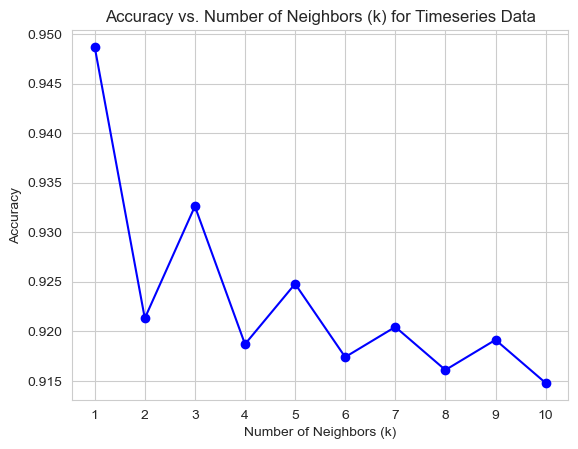

In [66]:
plt.plot(ks, time_acc, marker='o', linestyle='-', color='b')
plt.title('Accuracy vs. Number of Neighbors (k) for Timeseries Data')
plt.xlabel('Number of Neighbors (k)')
plt.ylabel('Accuracy')
plt.xticks(ks)
plt.grid(True)
#plt.show()
plt.savefig('knn_time.png')

In [41]:
print(time_acc)

[0.94869565 0.9326087  0.92478261 0.92043478 0.91478261]


In [47]:
ks = [1,2,3, 4, 5, 6, 7, 8, 9, 10]
fft_acc = np.zeros(len(ks))

for k in range(len(ks)):
    knn_classifier_fft = KNeighborsClassifier(n_neighbors=ks[k])  # You can adjust the number of neighbors (k)

    # Train the classifier on the training data
    knn_classifier_fft.fit(X_train_fft, y_train)

    # Make predictions on the test data
    y_pred_fft = knn_classifier_fft.predict(X_test_fft)

    fft_acc[k] = accuracy_score(y_test, y_pred_fft)
    

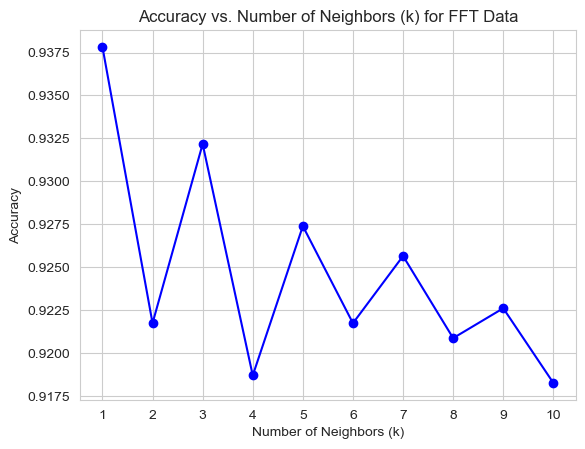

In [65]:
plt.plot(ks, fft_acc, marker='o', linestyle='-', color='b')
plt.title('Accuracy vs. Number of Neighbors (k) for FFT Data')
plt.xlabel('Number of Neighbors (k)')
plt.ylabel('Accuracy')
plt.xticks(ks)
plt.grid(True)
#plt.show()
plt.savefig('knn_fft.png')

In [25]:
# Create a k-nearest neighbors classifier (KNN)
knn_classifier_cwt = KNeighborsClassifier(n_neighbors=3)  # You can adjust the number of neighbors (k)

# Train the classifier on the training data
knn_classifier_cwt.fit(X_train_cwt_flat_real, y_train)

# Make predictions on the test data
y_pred_cwt = knn_classifier_cwt.predict(X_test_cwt_flat_real)


C:\Users\tranl\AppData\Roaming\Python\Python39\site-packages\joblib\externals\loky\backend\context.py:136: UserWarning: Could not find the number of physical cores for the following reason:
[WinError 2] The system cannot find the file specified
Returning the number of logical cores instead. You can silence this warning by setting LOKY_MAX_CPU_COUNT to the number of cores you want to use.
  warnings.warn(
  File "C:\Users\tranl\AppData\Roaming\Python\Python39\site-packages\joblib\externals\loky\backend\context.py", line 257, in _count_physical_cores
    cpu_info = subprocess.run(
  File "c:\Users\tranl\anaconda3\envs\ee269_env\lib\subprocess.py", line 505, in run
    with Popen(*popenargs, **kwargs) as process:
  File "c:\Users\tranl\anaconda3\envs\ee269_env\lib\subprocess.py", line 951, in __init__
    self._execute_child(args, executable, preexec_fn, close_fds,
  File "c:\Users\tranl\anaconda3\envs\ee269_env\lib\subprocess.py", line 1436, in _execute_child
    hp, ht, pid, tid = _wina

NameError: name 'accuracy_score' is not defined

In [28]:

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred_cwt)
conf_matrix = confusion_matrix(y_test, y_pred_cwt)

print("Accuracy:", accuracy)
print("\nConfusion Matrix:\n", conf_matrix)

Accuracy: 0.9682608695652174

Confusion Matrix:
 [[1821   14]
 [  59  406]]


In [43]:
ks = [1,2,3, 4, 5, 6, 7, 8, 9, 10]
cwt_acc = np.zeros(len(ks))

for k in range(len(ks)):
    knn_classifier_cwt = KNeighborsClassifier(n_neighbors=ks[k])  # You can adjust the number of neighbors (k)

    # Train the classifier on the training data
    knn_classifier_cwt.fit(X_train_cwt_flat_real, y_train)

    # Make predictions on the test data
    y_pred_cwt = knn_classifier_cwt.predict(X_test_cwt_flat_real)

    cwt_acc[k] = accuracy_score(y_test, y_pred_cwt)
    

In [44]:
print(cwt_acc)

[0.97173913 0.96086957 0.96826087 0.96434783 0.96782609 0.9626087
 0.96434783 0.96130435 0.96478261 0.9626087 ]


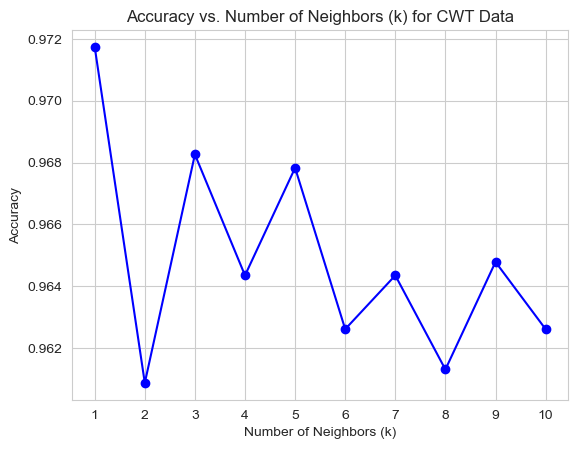

In [64]:
plt.plot(ks, cwt_acc, marker='o', linestyle='-', color='b')
plt.title('Accuracy vs. Number of Neighbors (k) for CWT Data')
plt.xlabel('Number of Neighbors (k)')
plt.ylabel('Accuracy')
plt.xticks(ks)
plt.grid(True)
#plt.show()
plt.savefig('knn_cwt.png')

[0.94869565 0.92130435 0.9326087  0.91869565 0.92478261 0.9173913
 0.92043478 0.91608696 0.91913043 0.91478261]
[0.93782609 0.92173913 0.93217391 0.91869565 0.9273913  0.92173913
 0.92565217 0.92086957 0.9226087  0.91826087]
[0.97173913 0.96086957 0.96826087 0.96434783 0.96782609 0.9626087
 0.96434783 0.96130435 0.96478261 0.9626087 ]


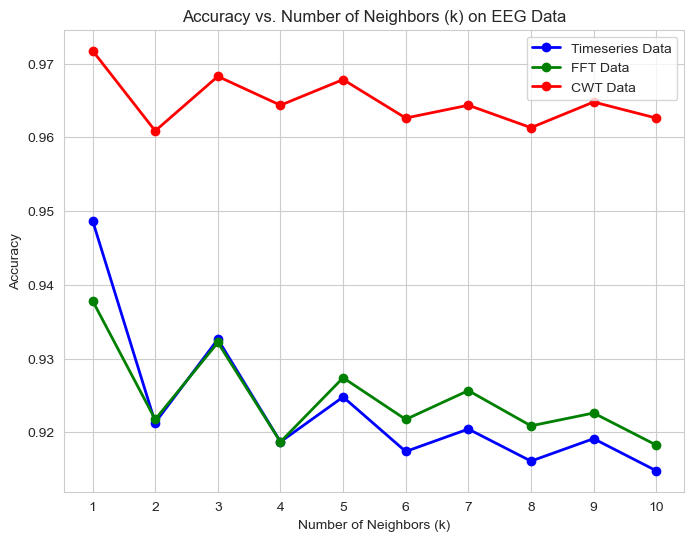

In [75]:
plt.figure(figsize=(8, 6))

plt.plot(ks, time_acc, label='Timeseries Data', color='blue', marker='o', linestyle='-', linewidth=2)
plt.plot(ks, fft_acc, label='FFT Data', color='green', marker='o', linestyle='-', linewidth=2)
plt.plot(ks, cwt_acc, label='CWT Data', color='red', marker='o', linestyle='-', linewidth=2)
plt.title('Accuracy vs. Number of Neighbors (k) on EEG Data')
plt.xlabel('Number of Neighbors (k)')
plt.ylabel('Accuracy')
plt.xticks(ks)

# Add legend
plt.legend()

# Show the plot
plt.grid(True)
#plt.show()
plt.savefig('knn_all.png')

print(time_acc)
print(fft_acc)
print(cwt_acc)

### Polynomial SVM

In [67]:
from sklearn.svm import SVC

In [76]:
degrees = [2, 3, 4, 5]
time_acc_svm = np.zeros(4)

for d in range(len(degrees)):
    poly_svm_model = SVC(kernel='poly', degree=degrees[d], C=1.0)

    # Fit the model on the training data
    poly_svm_model.fit(X_train, y_train)

    # Make predictions on the test data
    y_pred = poly_svm_model.predict(X_test)

    # Evaluate the model
    accuracy = accuracy_score(y_test, y_pred)
    time_acc_svm[d] = accuracy

#conf_matrix = confusion_matrix(y_test, y_pred)

print(time_acc_svm)

[0.96695652 0.8726087  0.94782609 0.86434783]


In [69]:
print('Accuracy of Polynomial SVM with Time Data: ', accuracy)
print('Confusion Matrix of Polynomial SVM with Time Data: ', conf_matrix)

Accuracy of Polynomial SVM with Time Data:  0.8726086956521739
Confusion Matrix of Polynomial SVM with Time Data:  [[1832    3]
 [ 290  175]]


In [70]:
poly_svm_model = SVC(kernel='poly', degree=3, C=1.0)

# Fit the model on the training data
poly_svm_model.fit(X_train_fft, y_train)

# Make predictions on the test data
y_pred_fft = poly_svm_model.predict(X_test_fft)

# Evaluate the model
accuracy_fft = accuracy_score(y_test, y_pred_fft)
conf_matrix_fft = confusion_matrix(y_test, y_pred_fft)

In [77]:
degrees = [2, 3, 4, 5]
freq_acc_svm = np.zeros(4)

for d in range(len(degrees)):
    poly_svm_model = SVC(kernel='poly', degree=degrees[d], C=1.0)

    # Fit the model on the training data
    poly_svm_model.fit(X_train_fft, y_train)

    # Make predictions on the test data
    y_pred = poly_svm_model.predict(X_test_fft)

    # Evaluate the model
    accuracy = accuracy_score(y_test, y_pred)
    freq_acc_svm[d] = accuracy

#conf_matrix = confusion_matrix(y_test, y_pred)

print(freq_acc_svm)

[0.9573913  0.86782609 0.94608696 0.86782609]


In [71]:
print('Accuracy of Polynomial SVM with FFT Data: ', accuracy_fft)
print('Confusion Matrix of Polynomial SVM with FFT Data: ', conf_matrix_fft)

Accuracy of Polynomial SVM with FFT Data:  0.8678260869565217
Confusion Matrix of Polynomial SVM with FFT Data:  [[1834    1]
 [ 303  162]]


In [72]:
poly_svm_model = SVC(kernel='poly', degree=3, C=1.0)

# Fit the model on the training data
poly_svm_model.fit(X_train_cwt_flat_real, y_train)

# Make predictions on the test data
y_pred_cwt = poly_svm_model.predict(X_test_cwt_flat_real)

# Evaluate the model
accuracy_cwt = accuracy_score(y_test, y_pred_cwt)
conf_matrix_cwt = confusion_matrix(y_test, y_pred_cwt)

In [78]:
degrees = [2, 3, 4, 5]
cwt_acc_svm = np.zeros(4)

for d in range(len(degrees)):
    poly_svm_model = SVC(kernel='poly', degree=degrees[d], C=1.0)

    # Fit the model on the training data
    poly_svm_model.fit(X_train_cwt_flat_real, y_train)

    # Make predictions on the test data
    y_pred = poly_svm_model.predict(X_test_cwt_flat_real)

    # Evaluate the model
    accuracy = accuracy_score(y_test, y_pred)
    cwt_acc_svm[d] = accuracy

#conf_matrix = confusion_matrix(y_test, y_pred)

print(cwt_acc_svm)

[0.97347826 0.9726087  0.97130435 0.97086957]


In [74]:
print('Accuracy of Polynomial SVM with CWT Data: ', accuracy_cwt)
print('Confusion Matrix of Polynomial SVM with CWT Data: ', conf_matrix_cwt)

Accuracy of Polynomial SVM with CWT Data:  0.9726086956521739
Confusion Matrix of Polynomial SVM with CWT Data:  [[1826    9]
 [  54  411]]


### Feature Extraction
#### Time series data

In [1]:
from sklearn.preprocessing import PolynomialFeatures

In [29]:
# Example feature expansion using PolynomialFeatures
degree = 2  # Set the degree of polynomial features
poly = PolynomialFeatures(degree=degree, include_bias=False)
expanded_features = poly.fit_transform(timeseries_data)

X_train_feat, X_test_feat, y_train_feat, y_test_feat = train_test_split(expanded_features, y, test_size=0.2, random_state=42)

#### fft data


In [36]:
fs = 173.559
N = len(X_train[0,:])
time = np.linspace(0,N-1, N) / fs
freq = fs * np.linspace(-N//2, N//2, N, dtype = float) / N

data_fft = np.zeros(timeseries_data.shape)
for i in range(len(timeseries_data[:,0])):
    data_fft[i,:] = np.fft.fftshift(np.fft.fft(timeseries_data[i,:]))

C:\Users\tranl\AppData\Local\Temp\ipykernel_16804\3944779505.py:8: ComplexWarning: Casting complex values to real discards the imaginary part
  data_fft[i,:] = np.fft.fftshift(np.fft.fft(timeseries_data[i,:]))


In [37]:
# Example feature expansion using PolynomialFeatures
degree = 2  # Set the degree of polynomial features
poly = PolynomialFeatures(degree=degree, include_bias=False)
expanded_features_fft = poly.fit_transform(data_fft)

X_train_feat_fft, X_test_feat_fft, y_train_feat_fft, y_test_feat_fft = train_test_split(expanded_features_fft, y, test_size=0.2, random_state=42)

#### cwt data 

In [41]:
width = fs
widths = np.arange(1, width)
wavelet = 'cmor'


cwt_data = []
for i in range(len(timeseries_data[:,1])):
    cwtmat, freq_cwt = pywt.cwt(timeseries_data[i],  widths, wavelet, sampling_period = 1/fs)
    cwt_data.append(cwtmat.flatten())
    
duration = N/fs
time = np.arange(N)/fs


c:\Users\tranl\anaconda3\envs\ee269_env\lib\site-packages\pywt\_cwt.py:117: FutureWarning: Wavelets from the family cmor, without parameters specified in the name are deprecated. The name should takethe form cmorB-C where B and C are floats representing the bandwidth frequency and center frequency, respectively (example: cmor1.5-1.0).
  wavelet = DiscreteContinuousWavelet(wavelet)


In [47]:
from scipy.signal import cwt, find_peaks
from scipy.stats import skew, kurtosis

In [53]:
# Feature extraction by summarizing the CWT data
summarized_features = np.sum(np.abs(cwt_data), axis=0)

# Reshape for scikit-learn compatibility
features_cwt = summarized_features.reshape(-1, 1)

X_train_cwt, X_test_cwt, y_train_cwt, y_test_cwt = train_test_split(features_cwt, np.random.rand(len(summarized_features)), test_size=0.2, random_state=42)


MemoryError: Unable to allocate 2.64 GiB for an array with shape (11500, 30794) and data type float64

In [49]:

#mean_amplitude = np.mean(np.abs(cwt_data), axis=0)
#max_amplitude = np.max(np.abs(cwt_data), axis=0)
#skewness = skew(np.abs(cwt_data), axis=0)
#kurt = kurtosis(np.abs(cwt_data), axis=0)

#features_cwt = np.vstack((mean_amplitude, max_amplitude, skewness, kurt)).T

# Split the data into training and testing sets
#X_train_cwt, X_test_cwt, y_train_cwt, y_test_cwt = train_test_split(features_cwt, np.random.rand(features_cwt.shape[1]), test_size=0.2, random_state=42)


MemoryError: Unable to allocate 2.64 GiB for an array with shape (30794, 11500) and data type float64

In [43]:
# Example feature expansion using PolynomialFeatures
degree = 2  # Set the degree of polynomial features
poly = PolynomialFeatures(degree=degree, include_bias=False)
cwt_data = np.abs(cwt_data)
expanded_features_cwt = poly.fit_transform(cwt_data)

X_train_feat_fft, X_test_feat_fft, y_train_feat_fft, y_test_feat_fft = train_test_split(cwt_data, y, test_size=0.2, random_state=42)

MemoryError: Unable to allocate 39.7 TiB for an array with shape (11500, 474181409) and data type float64